In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "../database_backups_csv/RT/RT_Activity.csv"

custom_names = ["ActivityCode", "UserID", "WorkCode", "AssignmentID", "ProductID", "Quantity", "Timestamp", "LocationID"]

custom_dtypes = {
    "ActivityCode": str,
    "UserID": int,
    "WorkCode": str,
    "AssignmentID": int,
    "ProductID": float,
    "Quantity": float,
    "Timestamp": str,
    "LocationID": float
}

activity = pd.read_csv(path, header=None, names=custom_names, dtype=custom_dtypes)
activity["Timestamp"] = pd.to_datetime(activity["Timestamp"])
activity["Seconds"] = (activity["Timestamp"] - activity["Timestamp"].dt.floor("D")).dt.total_seconds()
activity.head(20)

,ActivityCode,UserID,WorkCode,AssignmentID,ProductID,Quantity,Timestamp,LocationID,Seconds
0,AssignmentOpen,534,02,4477546,NaN,NaN,2024-05-28 06:42:22.580,NaN,24142.580
1,AssignmentOpen,534,02,4477547,NaN,NaN,2024-05-28 06:42:23.587,NaN,24143.587
2,AssignmentOpen,534,02,4477548,NaN,NaN,2024-05-28 06:42:24.580,NaN,24144.580
3,AssignmentOpen,534,02,4477549,NaN,NaN,2024-05-28 06:42:26.347,NaN,24146.347
4,AssignmentOpen,534,02,4477550,NaN,NaN,2024-05-28 06:42:26.983,NaN,24146.983
5,AssignmentOpen,534,02,4477551,NaN,NaN,2024-05-28 06:42:27.800,NaN,24147.800
6,AssignmentOpen,534,02,4477513,NaN,NaN,2024-05-28 06:42:28.610,NaN,24148.610
7,PickPut,534,02,4477546,11661.0,1.0,2024-05-28 06:43:14.933,103452.0,24194.933
8,PickPut,534,02,4477547,11661.0,1.0,2024-05-28 06:43:22.303,103452.0,24202.303
9,PickPut,534,02,4477548,11661.0,1.0,2024-05-28 06:43:25.400,103452.0,24205.400


In [4]:
activity.shape

(225358, 9)

In [4]:
activity.isnull().sum()

ActivityCode         0
UserID               0
WorkCode          1014
AssignmentID         0
ProductID       131183
Quantity        131183
Timestamp            0
LocationID      131183
Seconds              0
dtype: int64

In [5]:
import duckdb

query = """
SELECT ActivityCode, UserID, WorkCode, AssignmentID, ProductID, Quantity, Timestamp, LocationID, (Seconds - LAG(Seconds, 1) OVER (PARTITION BY AssignmentID ORDER BY Seconds)) AS TimeTaken
FROM activity
ORDER BY Seconds DESC;
"""

result = duckdb.sql(query).df()
result.head(10)

,ActivityCode,UserID,WorkCode,AssignmentID,ProductID,Quantity,Timestamp,LocationID,TimeTaken
0,PickPut,515,04,4513686,14806.0,2.0,2024-06-10 18:16:27.893,481878.0,34.000
1,PickPut,515,04,4513686,18223.0,1.0,2024-06-10 18:15:53.893,106761.0,20.686
2,PickPut,515,04,4513686,13826.0,1.0,2024-06-10 18:15:33.207,324430.0,57.174
3,PickPut,515,04,4513686,16371.0,2.0,2024-06-10 18:14:36.033,112953.0,2.026
4,PickPut,588,03,4511712,20269.0,1.0,2024-06-10 18:14:35.453,201217.0,36.363
5,PickPut,515,04,4513686,26836.0,4.0,2024-06-10 18:14:34.007,110582.0,1.304
6,PickPut,515,04,4513686,26920.0,4.0,2024-06-10 18:14:32.703,112959.0,103.610
7,AssignmentOpen,588,03,4511712,NaN,NaN,2024-06-10 18:13:59.090,NaN,163.663
8,PickPut,515,04,4513686,19996.0,1.0,2024-06-10 18:12:49.093,124190.0,41.666
9,PickPut,409,04,4511709,11500.0,1.0,2024-06-10 18:12:22.000,478294.0,46.347


/var/folders/73/5rwjffnx27jg1j84mffv_y5m0000gn/T/ipykernel_51648/3883825300.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000)


Text(0.5, 1.0, 'RT Activity Task Times by WorkCode')

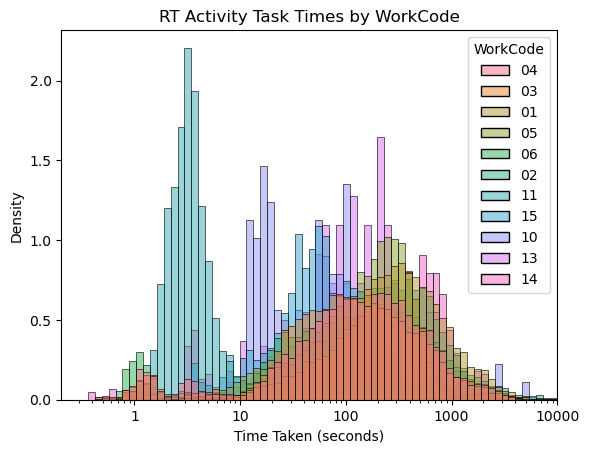

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

fig, ax = plt.subplots()
ax.set_xscale('log')

sns.histplot(data = result, x = "TimeTaken", hue = "WorkCode", stat="density", log_scale=True, common_norm=False)

formatter = mticker.ScalarFormatter()
ax.get_xaxis().set_major_formatter(formatter)

plt.xlim(0, 10000)
plt.xlabel("Time Taken (seconds)")
plt.title("RT Activity Task Times by WorkCode")

/var/folders/73/5rwjffnx27jg1j84mffv_y5m0000gn/T/ipykernel_51648/837106503.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000)


Text(0.5, 1.0, 'Times across Pick to Train WorkCodes')

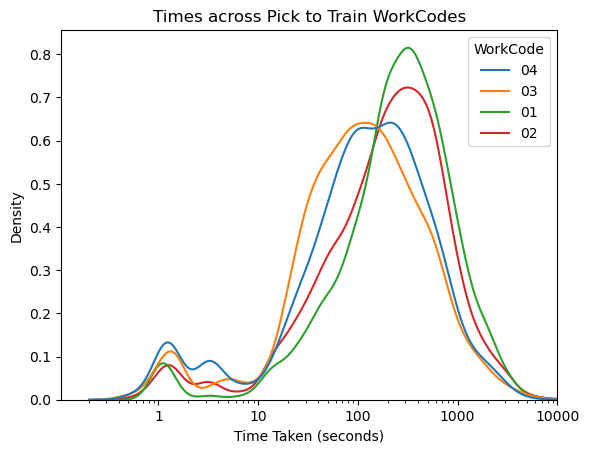

In [7]:
fig, ax = plt.subplots()

pick_train = result[result["WorkCode"].isin(["01", "02", "03", "04"])]
sns.kdeplot(data = pick_train, x = "TimeTaken", hue = "WorkCode", log_scale=True, common_norm=False)

formatter = mticker.ScalarFormatter()
ax.get_xaxis().set_major_formatter(formatter)

plt.xlim(0, 10000)
plt.xlabel("Time Taken (seconds)")
plt.title("Times across Pick to Train WorkCodes")

/var/folders/73/5rwjffnx27jg1j84mffv_y5m0000gn/T/ipykernel_51648/1623189952.py:1: FutureWarning: The provided callable <function median at 0x10c276170> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pick_train_means = pick_train.groupby("UserID").agg({"TimeTaken": np.median})


<Axes: xlabel='TimeTaken'>

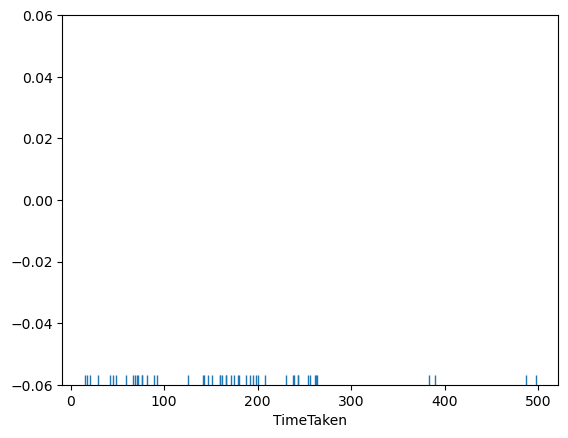

/var/folders/73/5rwjffnx27jg1j84mffv_y5m0000gn/T/ipykernel_51648/198891147.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000)


Text(0.5, 1.0, 'Times across Pick to Train WorkCodes')

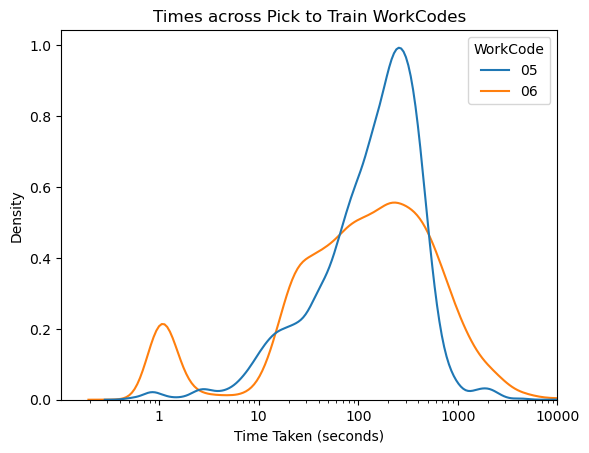

In [8]:
fig, ax = plt.subplots()

pick_item_cart = result[result["WorkCode"].isin(["05", "06", "07"])]
sns.kdeplot(data = pick_item_cart, x = "TimeTaken", hue = "WorkCode", log_scale=True, common_norm=False)

formatter = mticker.ScalarFormatter()
ax.get_xaxis().set_major_formatter(formatter)

plt.xlim(0, 10000)
plt.xlabel("Time Taken (seconds)")
plt.title("Times across Pick to Train WorkCodes")

## No data on 07, 08, 09

/var/folders/73/5rwjffnx27jg1j84mffv_y5m0000gn/T/ipykernel_51648/920104423.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000)


Text(0.5, 1.0, 'Times across (Case) Pick to Cart WorkCodes')

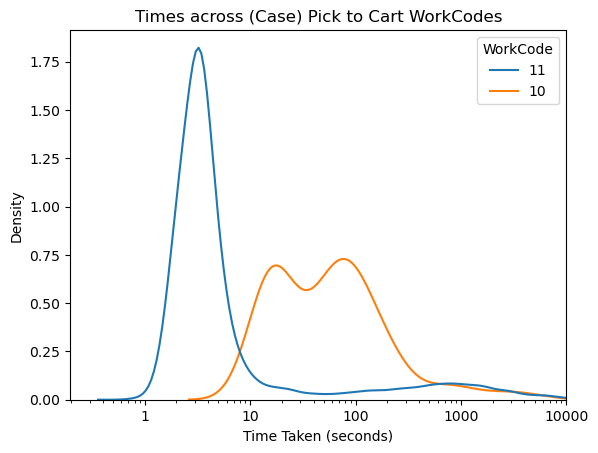

In [11]:
fig, ax = plt.subplots()

pick_case_cart = result[result["WorkCode"].isin(["10", "11", "12"])]
sns.kdeplot(data = pick_case_cart, x = "TimeTaken", hue = "WorkCode", log_scale=True, common_norm=False)

formatter = mticker.ScalarFormatter()
ax.get_xaxis().set_major_formatter(formatter)

plt.xlim(0, 10000)
plt.xlabel("Time Taken (seconds)")
plt.title("Times across (Case) Pick to Cart WorkCodes")

UserID
536    18601
168    16572
591     6970
293     5941
520     4955
589     4453
568     4381
582     3928
576     3488
506     3377
517     3124
587     2103
122     2026
560     1663
488     1255
96      1240
464      865
446      642
580      595
596      587
469      546
574      425
567      336
548      283
497      188
595      174
569      146
360      122
465      110
400       85
573       59
466       52
77        52
428       43
564       42
562       39
544       28
503       11
565       11
507       10
409        6
575        5
526        2
515        2
Name: count, dtype: int64

/var/folders/73/5rwjffnx27jg1j84mffv_y5m0000gn/T/ipykernel_33443/401490467.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000)


Text(0.5, 1.0, 'Times across Replenishment and Putaway WorkCodes')

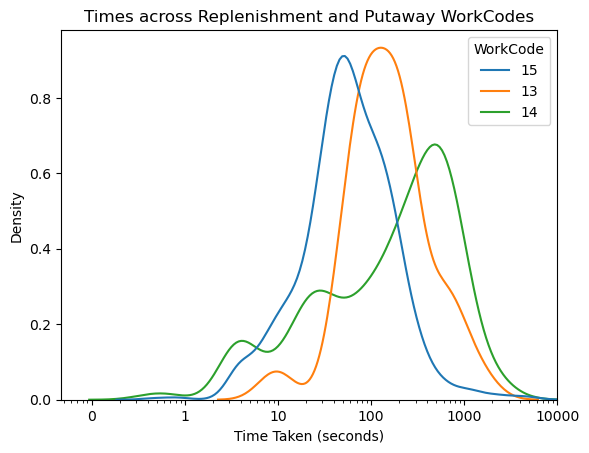

In [125]:
fig, ax = plt.subplots()

repl = result[result["WorkCode"].isin(["13", "14", "15"])]
sns.kdeplot(data = repl, x = "TimeTaken", hue = "WorkCode", log_scale=True, common_norm=False)

formatter = mticker.ScalarFormatter()
ax.get_xaxis().set_major_formatter(formatter)

plt.xlim(0, 10000)
plt.xlabel("Time Taken (seconds)")
plt.title("Times across Replenishment and Putaway WorkCodes")

In [25]:
workcode_dict = {"01": "(Item) Pick to Train",
                 "02": "(Item) Pick to Train",
                 "03": "(Item) Pick to Train",
                 "04": "(Item) Pick to Train",
                 "05": "(Item) Pick to Cart",
                 "06": "(Item) Pick to Cart",
                 "07": "(Item) Pick to Cart",
                 "08": "(Case) Pick to Pallet",
                 "09": "(Case) Pick to Pallet",
                 "10": "(Case) Pick to Cart",
                 "11": "(Case) Pick to Cart",
                 "12": "(Case) Pick to Cart",
                 "13": "(Case) Replenishment",
                 "14": "(Item) Replenishment",
                 "15": "Putaway"}

result_wc = result.replace({"WorkCode": workcode_dict})

/var/folders/73/5rwjffnx27jg1j84mffv_y5m0000gn/T/ipykernel_51648/2776469660.py:1: FutureWarning: The provided callable <function median at 0x10c276170> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result_wc_med = result_wc.groupby(["WorkCode", "UserID"])["TimeTaken"].agg(np.median).reset_index()


Text(0.5, 1.0, 'Median Task Times by Users across WorkCodes')

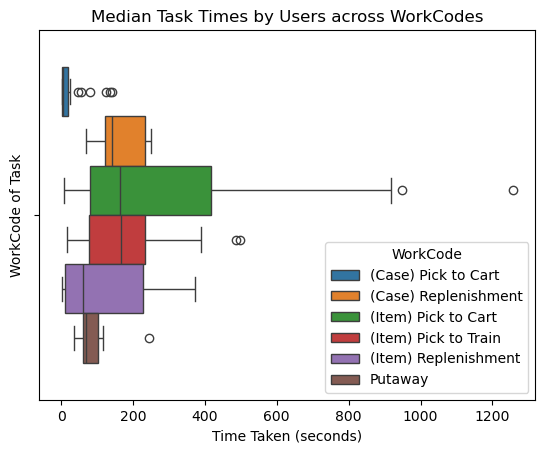

In [31]:
result_wc_med = result_wc.groupby(["WorkCode", "UserID"])["TimeTaken"].agg(np.median).reset_index()

sns.boxplot(data = result_wc_med, x = "TimeTaken", hue = "WorkCode")

plt.xlabel("Time Taken (seconds)")
plt.ylabel("WorkCode of Task")
plt.title("Median Task Times by Users across WorkCodes")

In [33]:
result_wc_med.sort_values("TimeTaken", ascending=False)

,WorkCode,UserID,TimeTaken
106,(Item) Pick to Cart,583,1256.490
68,(Item) Pick to Cart,466,948.800
114,(Item) Pick to Cart,596,919.137
110,(Item) Pick to Cart,590,876.470
98,(Item) Pick to Cart,571,755.397
...,...,...,...
120,(Item) Pick to Train,202,NaN
142,(Item) Pick to Train,530,NaN
145,(Item) Pick to Train,544,NaN
150,(Item) Pick to Train,562,NaN


<Axes: xlabel='TimeTaken', ylabel='Density'>

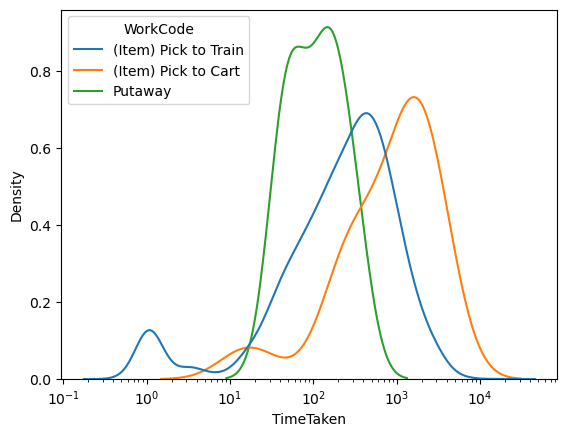

In [ ]:
five83 = (result_wc[result_wc["UserID"] == 583])
sns.kdeplot(data = five83, x = "TimeTaken", hue = "WorkCode", log_scale=True, common_norm=False)



In [45]:
result_wc.groupby("WorkCode")["WorkCode"].count()

WorkCode
(Case) Pick to Cart     89543
(Case) Replenishment      165
(Item) Pick to Cart     60579
(Item) Pick to Train    70872
(Item) Replenishment     1875
Putaway                  1310
Name: WorkCode, dtype: int64

In [82]:
result["Timestamp"].describe()

count                           225358
mean     2024-06-03 19:04:57.558653696
min         2024-05-28 06:42:22.580000
25%      2024-05-30 10:47:30.581499904
50%      2024-06-04 07:00:59.681500160
75%      2024-06-06 16:19:54.085250048
max         2024-06-11 11:30:17.583000
Name: Timestamp, dtype: object

In [46]:
result.loc[:, ["TimeTaken", "Quantity"]].describe()

,TimeTaken,Quantity
count,188234.000000,94175.000000
mean,272.290325,4.814579
std,858.636116,20.551100
min,0.363000,1.000000
25%,3.537000,1.000000
50%,48.742000,2.000000
75%,263.712250,4.000000
max,38002.863000,1589.000000


In [114]:
result.groupby("WorkCode")["WorkCode"].count().sort_values(ascending=False)

WorkCode
11    89271
06    34826
05    25753
01    23787
02    21277
04    14611
03    11197
14     1875
15     1310
10      272
13      165
Name: WorkCode, dtype: int64

In [68]:
result.groupby("WorkCode").agg({"TimeTaken":np.std}).sort_values("TimeTaken", ascending=False).rename(columns={"TimeTaken":"TimeTaken SD"})

/var/folders/73/5rwjffnx27jg1j84mffv_y5m0000gn/T/ipykernel_33443/3493240338.py:1: FutureWarning: The provided callable <function std at 0x10853f760> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  result.groupby("WorkCode").agg({"TimeTaken":np.std}).sort_values("TimeTaken", ascending=False).rename(columns={"TimeTaken":"TimeTaken SD"})


,TimeTaken SD
WorkCode,
15,1184.253053
11,1105.612699
02,767.303262
06,686.606198
01,624.502426
10,575.104548
03,478.436685
04,458.353519
14,442.330505
